In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


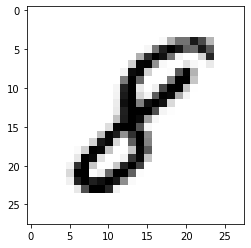

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2093 - accuracy: 0.9367
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0293 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

9


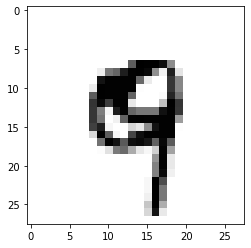

In [7]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [8]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import IPython
from six.moves import urllib

print(tf.__version__)

2.2.0


In [9]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [10]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

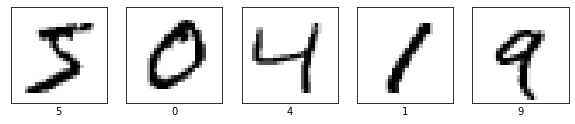

In [11]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [12]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1878 - accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0635 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0426 - accuracy: 0.9870


In [17]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9916
Test accuracy: 0.991599977016449
